<a href="https://colab.research.google.com/github/JMML2021/Tasca-M5-T02-Introducci-al-Machine-Learning/blob/main/Tasca_M5_T02_Machine_Leaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Activo Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [75]:
# Abro el fichero una vez adecuado

#path='https://drive.google.com/file/d/1j8WdhTxMpngrUigfcfrJynng-9JHo9xa/view?usp=sharing'
path = ('/content/drive/MyDrive/01_COLAB/housing data.csv')
#data = pd.read_csv(file,
    
df=  pd.read_csv(path, sep=',', encoding="latin-1")
df.shape

nRow, nCol = df.shape
print(f'Hay  {nRow} filas con {nCol} columnas')
df1=df.copy()
df1.iloc[0]

Hay  505 filas con 14 columnas


0.00632      0.02731
18.00        0.00000
2.310        7.07000
0            0.00000
0.5380       0.46900
6.5750       6.42100
65.20       78.90000
4.0900       4.96710
1            2.00000
296.0      242.00000
15.30       17.80000
396.90     396.90000
4.98         9.14000
24.00       21.60000
Name: 0, dtype: float64

Veo que es un fichero sin nombre en las columnas. Utilizo el fichero de TXT e identifico los nombres de las columnas.

In [11]:
columnas = list(df1.columns[:-1])
#columnas[0][0]
columnas

[('CRIM',),
 ('ZN',),
 ('INDUS',),
 ('CHAS',),
 ('NOX',),
 ('RM',),
 ('AGE',),
 ('DIS',),
 ('RAD',),
 ('TAX',),
 ('PTRATIO',),
 ('B',),
 ('LSTAT',)]

In [76]:
Nombre_Columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df1.columns = [Nombre_Columnas]
df1.iloc[0]

CRIM         0.02731
ZN           0.00000
INDUS        7.07000
CHAS         0.00000
NOX          0.46900
RM           6.42100
AGE         78.90000
DIS          4.96710
RAD          2.00000
TAX        242.00000
PTRATIO     17.80000
B          396.90000
LSTAT        9.14000
MEDV        21.60000
Name: 0, dtype: float64

In [77]:
# Analizo los datos
print(df1.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.1077

In [78]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     505 non-null    float64
 1   (ZN,)       505 non-null    float64
 2   (INDUS,)    505 non-null    float64
 3   (CHAS,)     505 non-null    int64  
 4   (NOX,)      505 non-null    float64
 5   (RM,)       505 non-null    float64
 6   (AGE,)      505 non-null    float64
 7   (DIS,)      505 non-null    float64
 8   (RAD,)      505 non-null    int64  
 9   (TAX,)      505 non-null    float64
 10  (PTRATIO,)  505 non-null    float64
 11  (B,)        505 non-null    float64
 12  (LSTAT,)    505 non-null    float64
 13  (MEDV,)     505 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


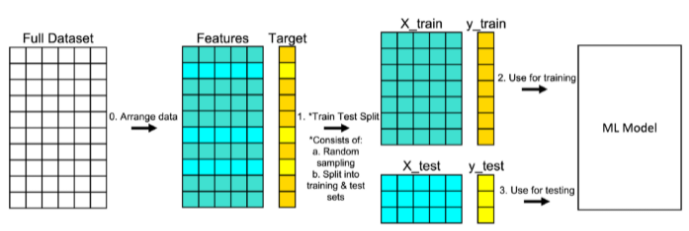

In [79]:
features = ['CRIM','ZN','INDUS','CHAS','NOX']
features = columnas
x = df1.loc[:, features]
y = df1.loc[:, ['MEDV']]

In [16]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:

from sklearn.model_selection import train_test_split   
    
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (404, 13)
xtest shape  :  (101, 13)
ytrain shape :  (404, 1)
ytest shape  :  (101, 1)


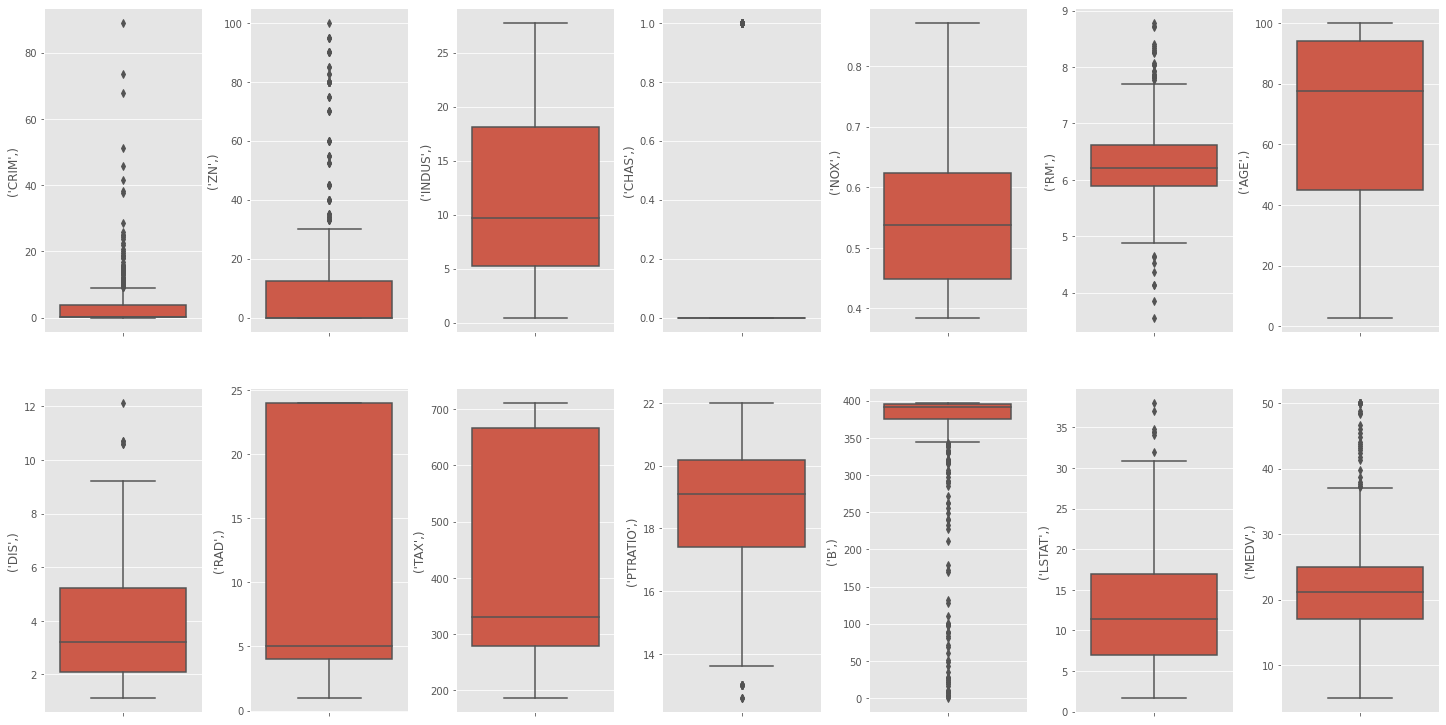

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df1.items():
    sns.boxplot(y=k, data=df1, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

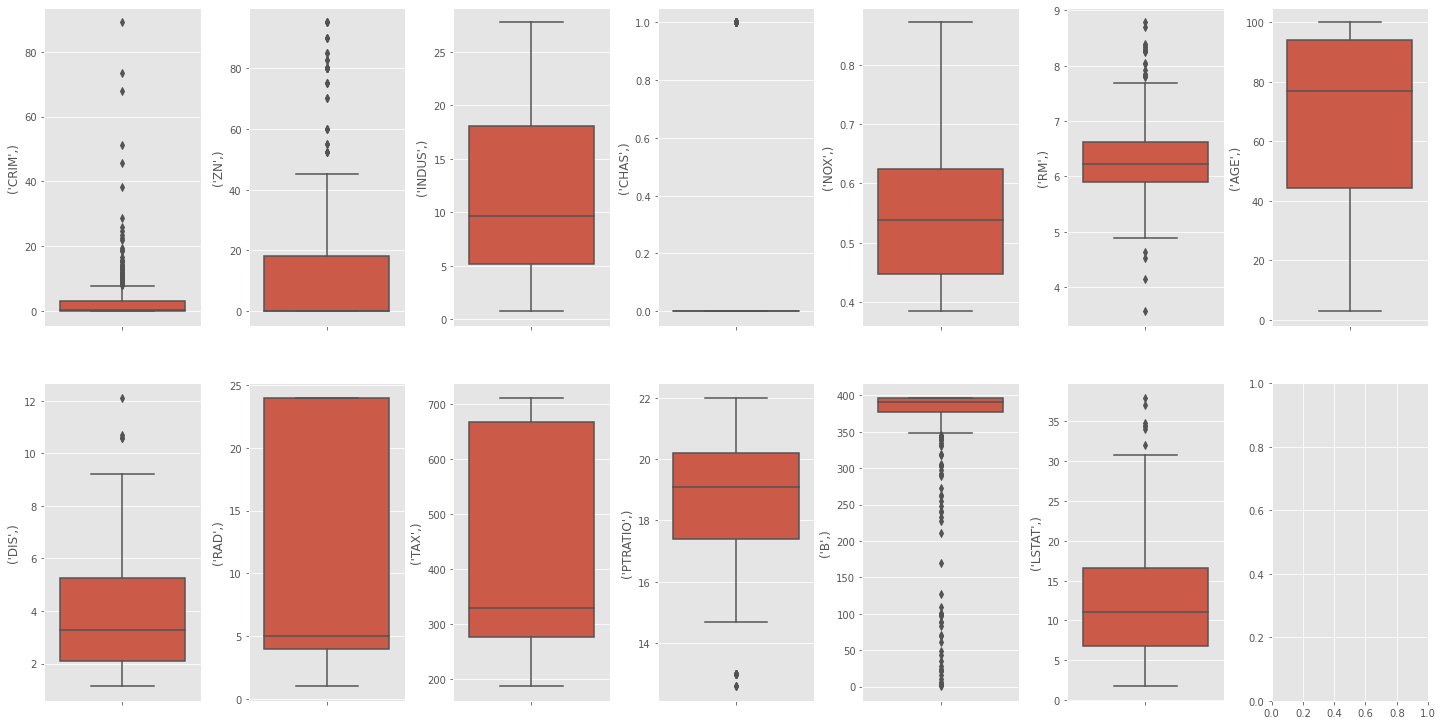

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtrain.items():
    sns.boxplot(y=k, data=xtrain, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

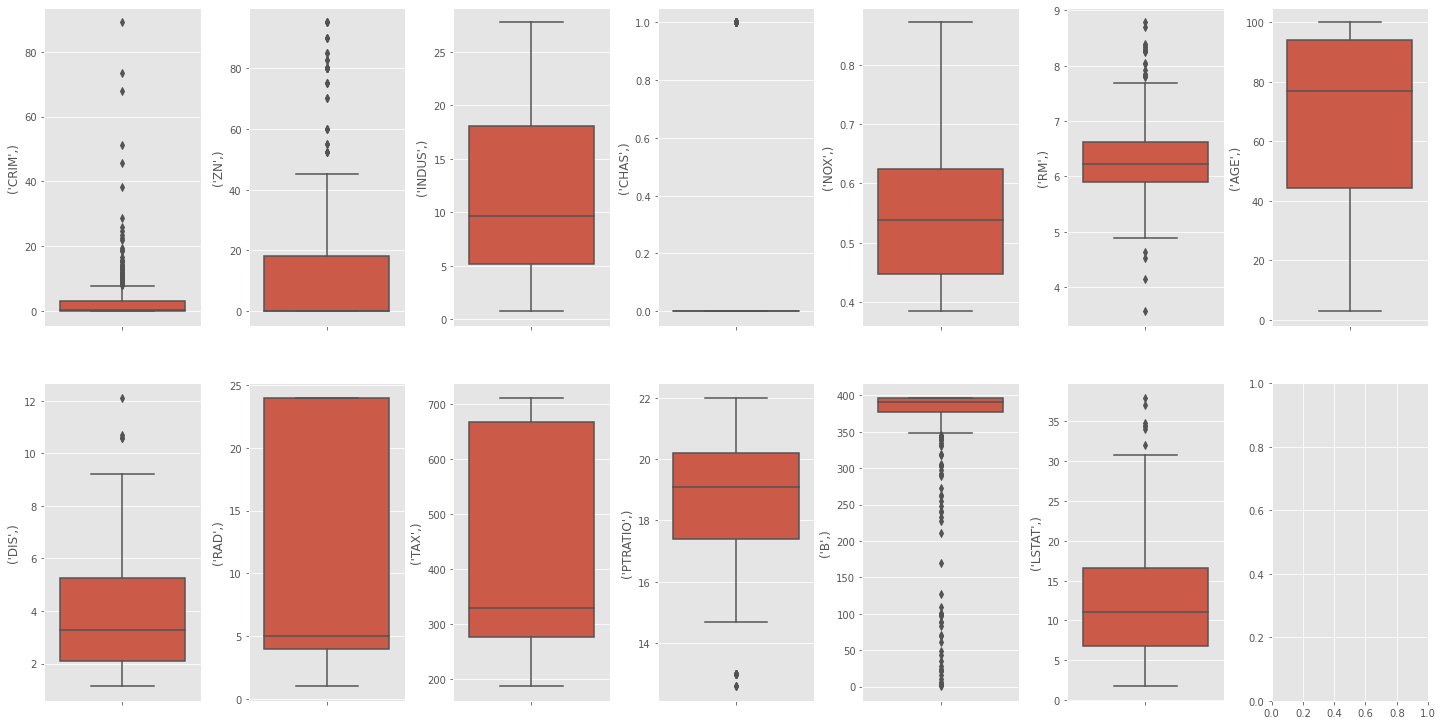

In [20]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in xtrain.items():
    sns.boxplot(y=k, data=xtrain, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

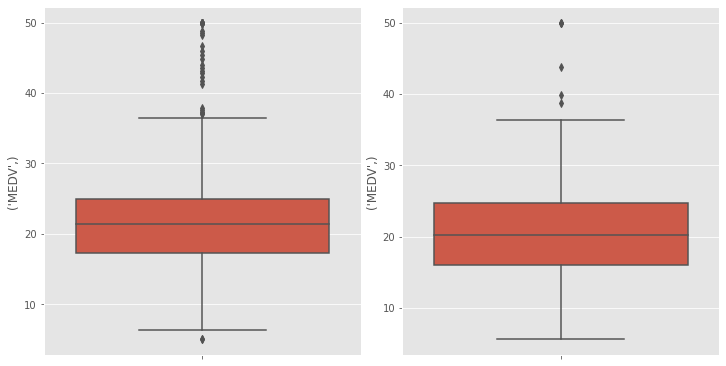

In [21]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()

for k,v in ytrain.items():
    sns.boxplot(y=k, data=ytrain, ax=axs[0])
    sns.boxplot(y=k, data=ytest, ax=axs[1])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

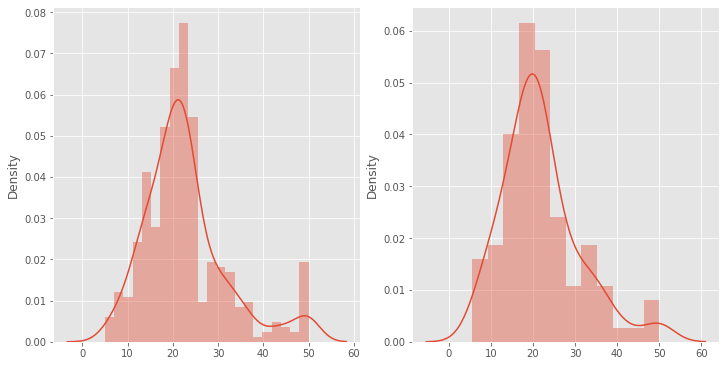

In [22]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(ytrain['MEDV'], ax=axs[0])
sns.distplot(ytest['MEDV'], ax=axs[1])
    #sns.distplot(v, ax=axs[index])

    #index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Veo que visualmente las dos graficas de los datos split son muy parecidas, por lo que deduzco que lo ha hecho correctamente.


In [23]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(xtrain, ytrain) 
   
y_pred = regressor.predict(xtest)

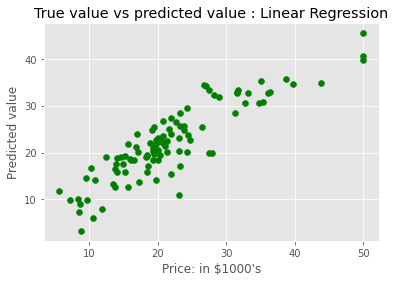

In [24]:
plt.scatter(ytest, y_pred, c = 'green') 
plt.xlabel("Price: in $1000's") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Linear Regression") 
plt.show() 

# - Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [25]:
from sklearn.preprocessing import MinMaxScaler
# define data
 
print('MEdia de CRIM:',xtrain['CRIM'].mean())
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(xtrain['CRIM'])
print('Media de CRIM transformado ',scaled.mean())

MEdia de CRIM: CRIM    3.446082
dtype: float64
Media de CRIM transformado  0.03863248924499451


Conclusión:
A modo de ejemplo he dibujado CRIM normalizado y como estan en df original.

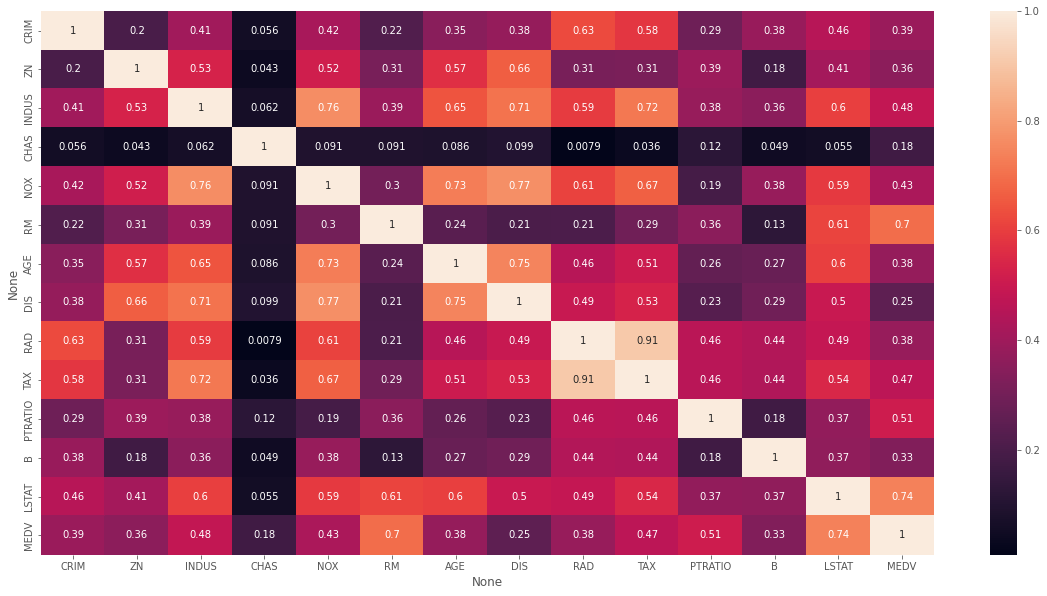

In [26]:
plt.figure(figsize=(20, 10))
sns.heatmap(df1.corr().abs(),  annot=True)

In [27]:
# Normalizo la columna CRIM

from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(xtrain['CRIM'])
normalized_CRIM = scaler.transform(xtrain['CRIM'])
#normalized_X_test = scaler.transform(xtest['CRIM'])


In [69]:
normalized_CRIM

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
399,1.0
400,1.0
401,1.0
402,1.0


In [28]:
# BINARIZACION

from sklearn.preprocessing import Binarizer


binarizer = Binarizer(threshold=0.2).fit(xtrain['CRIM'])
binary_CRIM = binarizer.transform(xtrain['CRIM'])

class sklearn.dummy.DummyRegressor(*, strategy='mean', constant=None, quantile=None)

https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [29]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

dummy_regr.fit(X, y)

dummy_regr.predict(X)

dummy_regr.score(X, y)

NameError: ignored

In [53]:
df1


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
501,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
502,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
503,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [30]:
#Generating Polynomial Features

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
polynomial_CRIMS =poly.fit_transform(xtrain['CRIM'])

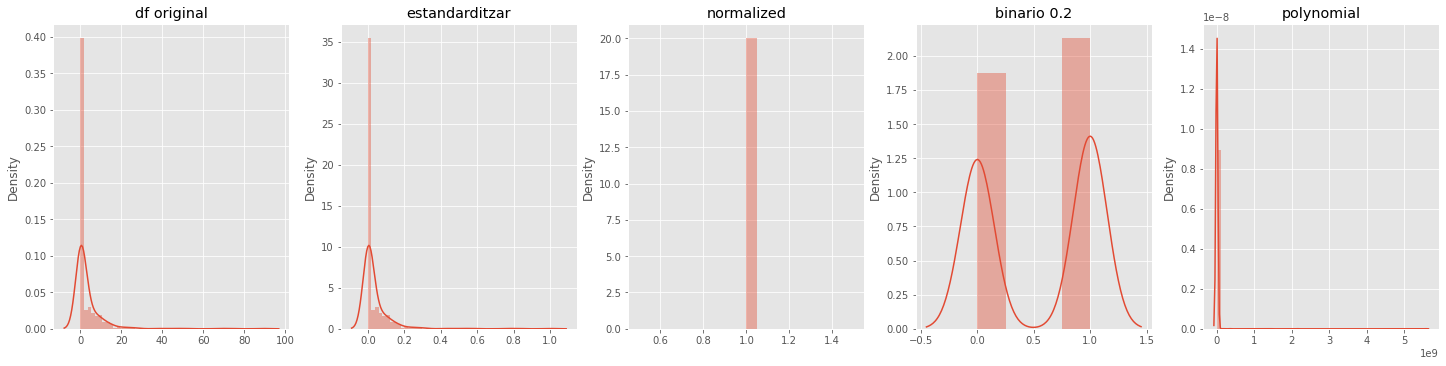

In [31]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()
#for k,v in ytrain.items():
    #sns.distplot(v, ax=axs[index])
sns.distplot(xtrain['CRIM'], ax=axs[0]).set(title='df original')
sns.distplot(scaled, ax=axs[1]).set(title='estandarditzar')
sns.distplot(normalized_CRIM, ax=axs[2]).set(title='normalized')
sns.distplot(binary_CRIM, ax=axs[3]).set(title='binario 0.2')
sns.distplot(polynomial_CRIMS, ax=axs[4]).set(title='polynomial')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica

In [51]:
binary_CRIM = pd.DataFrame(binary_CRIM)
binary_CRIM

,0
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
399,1.0
400,0.0
401,0.0
402,1.0


In [33]:
# Analizo los datos
print(binary_CRIM.describe())

                0
count  404.000000
mean     0.532178
std      0.499582
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [34]:
normalized_CRIM = pd.DataFrame(normalized_CRIM)
print(normalized_CRIM.describe())

           0
count  404.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0


In [50]:
polynomial_CRIMS =pd.DataFrame(polynomial_CRIMS)
print(polynomial_CRIMS.describe())

           0           1            2             3             4  \
count  404.0  404.000000   404.000000  4.040000e+02  4.040000e+02   
mean     1.0    3.446082    88.744553  4.676252e+03  3.222652e+05   
std      0.0    8.778372   561.399813  4.387185e+04  3.614744e+06   
min      1.0    0.009060     0.000082  7.436774e-07  6.737717e-09   
25%      1.0    0.079710     0.006354  5.064557e-04  4.036986e-05   
50%      1.0    0.243125     0.059114  1.437426e-02  3.495521e-03   
75%      1.0    3.202962    10.263617  3.290412e+01  1.055373e+02   
max      1.0   88.976200  7916.764166  7.044036e+05  6.267515e+07   

                  5  
count  4.040000e+02  
mean   2.446345e+07  
std    3.060138e+08  
min    6.104372e-11  
25%    3.217911e-06  
50%    8.501009e-04  
75%    3.386661e+02  
max    5.576597e+09  


In [36]:
polynomial_CRIMS

,0,1,2,3,4,5
0,1.0,0.52014,0.270546,0.140722,7.319493e-02,3.807161e-02
1,1.0,0.09164,0.008398,0.000770,7.052455e-05,6.462870e-06
2,1.0,5.82401,33.919092,197.545134,1.150505e+03,6.700552e+03
3,1.0,0.14455,0.020895,0.003020,4.365886e-04,6.310888e-05
4,1.0,25.94060,672.914728,17455.811802,4.528142e+05,1.174627e+07
...,...,...,...,...,...,...
399,1.0,0.34109,0.116342,0.039683,1.353555e-02,4.616841e-03
400,1.0,0.02187,0.000478,0.000010,2.287679e-07,5.003155e-09
401,1.0,0.13058,0.017051,0.002227,2.907413e-04,3.796499e-05
402,1.0,0.25387,0.064450,0.016362,4.153800e-03,1.054525e-03


In [37]:
df_CRIM = pd.concat([polynomial_CRIMS, normalized_CRIM, binary_CRIM])
df_CRIM

,0,1,2,3,4,5
0,1.0,0.52014,0.270546,0.140722,0.073195,3.807161e-02
1,1.0,0.09164,0.008398,0.000770,0.000071,6.462870e-06
2,1.0,5.82401,33.919092,197.545134,1150.504835,6.700552e+03
3,1.0,0.14455,0.020895,0.003020,0.000437,6.310888e-05
4,1.0,25.94060,672.914728,17455.811802,452814.231644,1.174627e+07
...,...,...,...,...,...,...
399,1.0,NaN,NaN,NaN,NaN,NaN
400,0.0,NaN,NaN,NaN,NaN,NaN
401,0.0,NaN,NaN,NaN,NaN,NaN
402,1.0,NaN,NaN,NaN,NaN,NaN


*texto en cursiva*# Nueva sección

# Guardo el fichero EXCEL

In [49]:
# Pruebo esta manera de guardar el fichero EXCEL en DRIVE
# CUidado que la hora no coincide con la del ordenador


#Save only the first secuence.
from datetime import datetime
fecha=datetime.now()

path = '/content/drive/MyDrive/01_COLAB/polinomioBorrar_'  + str(fecha) + ".xlsx"

df_CRIM.to_excel(path)
print()
print('Guardado fichero :' , path)
print()
print()


Guardado fichero : /content/drive/MyDrive/01_COLAB/polinomioBorrar_2022-07-11 08:01:47.046946.xlsx




# Visualizacion grafica de las transformaciones:

In [137]:
features = ['CRIM','ZN','INDUS','CHAS','NOX']
features = columnas
x = df1.loc[:, features]
x= x['CRIM']
y = df1.loc[:, ['MEDV']]

In [138]:
from sklearn.model_selection import train_test_split   
    
X_full, xtest, y_ful, ytest = train_test_split(x, y, test_size =0.2, 
                                                    random_state = 0) 
   
print("X_full shape : ", X_full.shape) 
print("xtest shape  : ", xtest.shape) 
print("y_ful shape : ", y_ful.shape) 
print("ytest shape  : ", ytest.shape) 

X_full shape :  (404, 1)
xtest shape  :  (101, 1)
y_ful shape :  (404, 1)
ytest shape  :  (101, 1)


https://runebook.dev/es/docs/scikit_learn/auto_examples/preprocessing/plot_all_scaling

In [139]:
distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
]

In [140]:
# Autor: Raghav RV <rvraghav93@gmail.com>
#          Guillaume Lemaitre <g.lemaitre58@gmail.com>
#          Thomas Unterthiner
# 

import numpy as np

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn.datasets import fetch_california_housing

print(__doc__)

#dataset = fetch_california_housing()

# X_full, y_full = dataset.data, dataset.target

# Tome solo 2 funciones para facilitar la visualización
# La característica de 0 tiene una distribución de cola larga.
# La característica 5 tiene algunos valores atípicos, pero muy grandes.

#X = X_full[:, [0, 5]]
'''
distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]
'''

# escalar la salida entre 0 y 1 para la barra de colores
y = minmax_scale(y_full)

# plasma no existe en matplotlib <1,5
cmap = getattr(cm, 'plasma_r', cm.hot_r)

#
def create_axes(title, figsize=(16, 6)):
    fig = plt.figure(figsize=figsize)
    fig.suptitle(title)

    # definir el eje para el primer gráfico
    left, width = 0.1, 0.22
    bottom, height = 0.1, 0.7
    bottom_h = height + 0.15
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter = plt.axes(rect_scatter)
    ax_histx = plt.axes(rect_histx)
    ax_histy = plt.axes(rect_histy)

    # definir el eje para el gráfico ampliado
    left = width + left + 0.2
    left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.1]
    rect_histy = [left_h, bottom, 0.05, height]

    ax_scatter_zoom = plt.axes(rect_scatter)
    ax_histx_zoom = plt.axes(rect_histx)
    ax_histy_zoom = plt.axes(rect_histy)

    # definir el eje de la barra de colores
    left, width = width + left + 0.13, 0.01

    rect_colorbar = [left, bottom, width, height]
    ax_colorbar = plt.axes(rect_colorbar)

    return ((ax_scatter, ax_histy, ax_histx),
            (ax_scatter_zoom, ax_histy_zoom, ax_histx_zoom),
            ax_colorbar)

# Dibujar las distribuciones:

def plot_distribution(axes, X, y, hist_nbins=50, title="",
                      x0_label="", x1_label=""):
    ax, hist_X1, hist_X0 = axes

    ax.set_title(title)
    ax.set_xlabel(x0_label)
    ax.set_ylabel(x1_label)

    # El diagrama de dispersión
    colors = cmap(y)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5, marker='o', s=5, lw=0, c=colors)

    # Retirar la parte superior y la columna derecha por estética
    # hacer un buen diseño de ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))

    # Histograma para el eje X1 (función 5)
    hist_X1.set_ylim(ax.get_ylim())
    hist_X1.hist(X[:, 1], bins=hist_nbins, orientation='horizontal',
                 color='grey', ec='grey')
    hist_X1.axis('off')

    # Histograma para el eje X0 (función 0)
    hist_X0.set_xlim(ax.get_xlim())
    hist_X0.hist(X[:, 0], bins=hist_nbins, orientation='vertical',
                 color='grey', ec='grey')
    hist_X0.axis('off')


distributions = [
    ('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),
]



In [148]:
#creamos los plots para ver como varia con cada transformación:

def make_plot(item_idx):
    titulo, X = distributions[item_idx]
    print('--> ', pd.DataFrame(X[0:3])) # Para ver que datos saca

    ax_zoom_out, ax_zoom_in, ax_colorbar = create_axes(titulo)
    axarr = (ax_zoom_out, ax_zoom_in)
    plot_distribution(axarr[0], X, y, hist_nbins=200,
                      x0_label="Media de Ingresos",
                      x1_label="Cantidad de edificios_1",
                      title="Full data")

    # zoom-in... Para quitar los outliers
    zoom_in_percentile_range = (0, 99)
    cutoffs_X0 = np.percentile(X[:, 0], zoom_in_percentile_range)
    cutoffs_X1 = np.percentile(X[:, 1], zoom_in_percentile_range)

    non_outliers_mask = (
        np.all(X > [cutoffs_X0[0], cutoffs_X1[0]], axis=1) &
        np.all(X < [cutoffs_X0[1], cutoffs_X1[1]], axis=1))
    plot_distribution(axarr[1], X[non_outliers_mask], y[non_outliers_mask],
                      hist_nbins=50,
                      x0_label="Media de Ingresos",
                      x1_label="Cantidad de edificios",
                      title="Sin outliers")
    
#Dibujamos la escal de colores de y
    norm = mpl.colors.Normalize(y_full.min(), y_full.max())
    mpl.colorbar.ColorbarBase(ax_colorbar, cmap=cmap,
                              norm=norm, orientation='vertical',
                              label='Color con la escala de y')

In [142]:
pd.DataFrame(X_full[0:5]) #, y_full

,CRIM
261,0.52014
71,0.09164
479,5.82401
6,0.14455
416,25.94060


In [143]:
pd.DataFrame(y_full[0:5]) #, y_full

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


0 estudio:  Unscaled data
-->          0         1
0  8.3252  2.555556
1  8.3014  2.109842
2  7.2574  2.802260


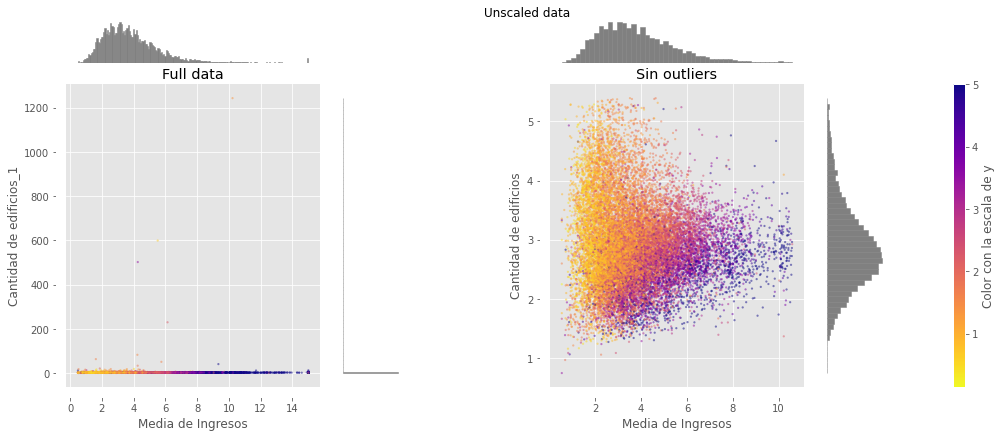

1 estudio:  Data after standard scaling
-->            0         1
0  2.344766 -0.049597
1  2.332238 -0.092512
2  1.782699 -0.025843


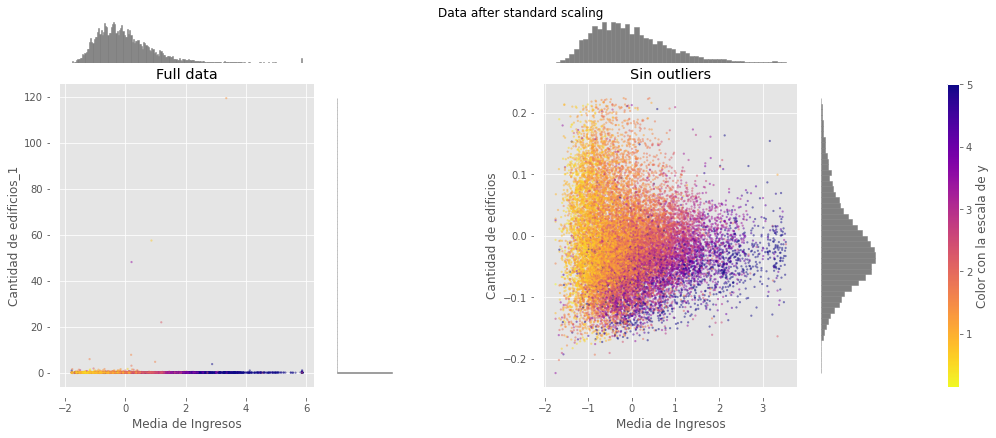

2 estudio:  Data after min-max scaling
-->            0         1
0  0.539668  0.001499
1  0.538027  0.001141
2  0.466028  0.001698


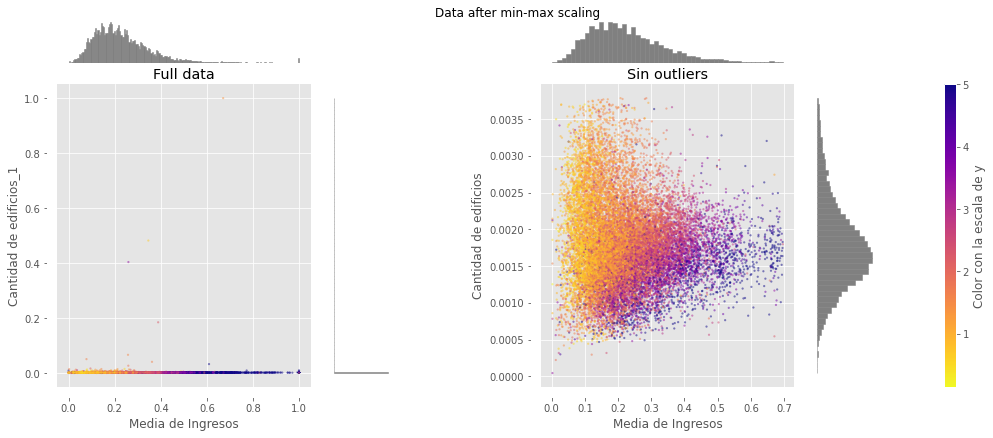

3 estudio:  Data after quantile transformation (uniform pdf)
-->            0         1
0  0.972520  0.326326
1  0.972217  0.109485
2  0.948467  0.488709


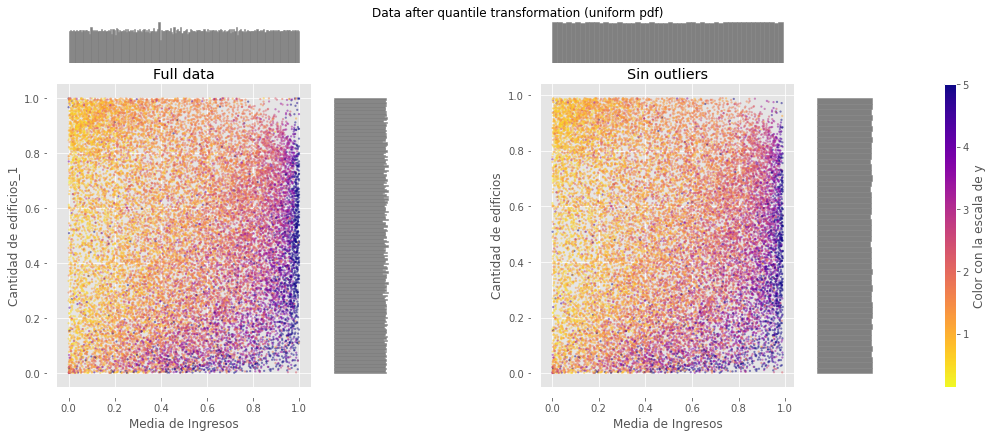

4 estudio:  Data after quantile transformation (gaussian pdf)
-->            0         1
0  1.919185 -0.450080
1  1.914418 -1.229273
2  1.630171 -0.028306


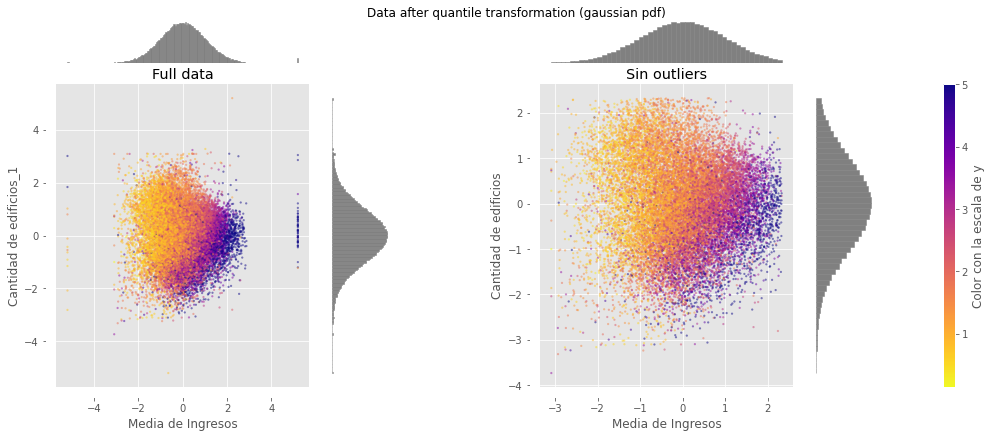

In [149]:
# Dibujo todas las transformaciones:

for s,t in enumerate(distributions):
  print(s, "estudio: ",distributions[s][0])
  make_plot(s)
  plt.show()

('Unscaled data', X),
    ('Data after standard scaling',
        StandardScaler().fit_transform(X)),
    ('Data after min-max scaling',
        MinMaxScaler().fit_transform(X)),
    ('Data after max-abs scaling',
        MaxAbsScaler().fit_transform(X)),
    ('Data after robust scaling',
        RobustScaler(quantile_range=(25, 75)).fit_transform(X)),
    ('Data after power transformation (Yeo-Johnson)',
     PowerTransformer(method='yeo-johnson').fit_transform(X)),
    ('Data after power transformation (Box-Cox)',
     PowerTransformer(method='box-cox').fit_transform(X)),
    ('Data after quantile transformation (uniform pdf)',
        QuantileTransformer(output_distribution='uniform')
        .fit_transform(X)),
    ('Data after quantile transformation (gaussian pdf)',
        QuantileTransformer(output_distribution='normal')
        .fit_transform(X)),
    ('Data after sample-wise L2 normalizing',
        Normalizer().fit_transform(X)),

In [145]:
y_full[1:3] #, 
y_full_2 = pd.DataFrame(y_full[1:3])
y_full_2

,0
0,3.585
1,3.521


In [146]:
dataset = fetch_california_housing()
X_full, y_full = dataset.data, dataset.target
X_full_2 = pd.DataFrame(X_full)
X_full_2

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [147]:
pd.DataFrame(y_full)

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847
